# Welcome the practice notebook
---
The objective of this practice is to provide a hands-on experience in data exploration and cleaning. Please follow the instructions provided in the  notebook to complete the practice.

Installing pyspark

In [1]:
#!pip install pyspark

Importing the needed modules and creating the spark session

In [2]:
# importing spark session
from pyspark.sql import SparkSession

# data visualization modules
import matplotlib.pyplot as plt
import plotly.express as px

# pandas module
import pandas as pd

# pyspark SQL functions
from pyspark.sql.functions import col, when, count

# creating the spark session
spark = SparkSession.builder.appName("Datasets/Customer_Churn_Prediction").getOrCreate()
spark

Loading the `parctice-dataset.csv` file

In [3]:
data = spark.read.format('csv').option('header',True).option('inferSchema',True).load('Datasets/Practice_dataset.csv')
data.show(5)


+----------+------------+------------+------------+------------+----------------+
|EmployeeID|        KPI1|        KPI2|        KPI3|        KPI4|Current Employee|
+----------+------------+------------+------------+------------+----------------+
|         0|-1.039682384|-0.716426478|-0.513467693| 0.414661471|               0|
|         1| 0.237093465|-0.820123996|-0.865801274| 0.438661047|               0|
|         2|-2.077948003| 0.185688029|-0.132418305| 0.711280402|               1|
|         3|-0.684711628| 1.522335039| 1.674082146|-1.234292085|               1|
|         4|-1.137117653|-0.555136531|-0.176780706|-1.776008972|               0|
+----------+------------+------------+------------+------------+----------------+
only showing top 5 rows



How many rows and columns do we have in the dataset?

In [4]:
# write your code here
print(data.count())
len(data.columns)

10000


6

Create a histogram matrix to analyse the distributions of the numerical columns.

- *Hint 1: List of the numerical columns = `["KPI1","KPI2","KPI3","KPI4"]`* <br>
- *Hint 2: To create the histograms, first you will need to convert the pyspark dataframe into a pandas dataframe.*

<ipython-input-5-d0f94232d6ca>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, bins = 20)


array([[<Axes: title={'center': 'KPI1'}>,
        <Axes: title={'center': 'KPI2'}>],
       [<Axes: title={'center': 'KPI3'}>,
        <Axes: title={'center': 'KPI4'}>]], dtype=object)

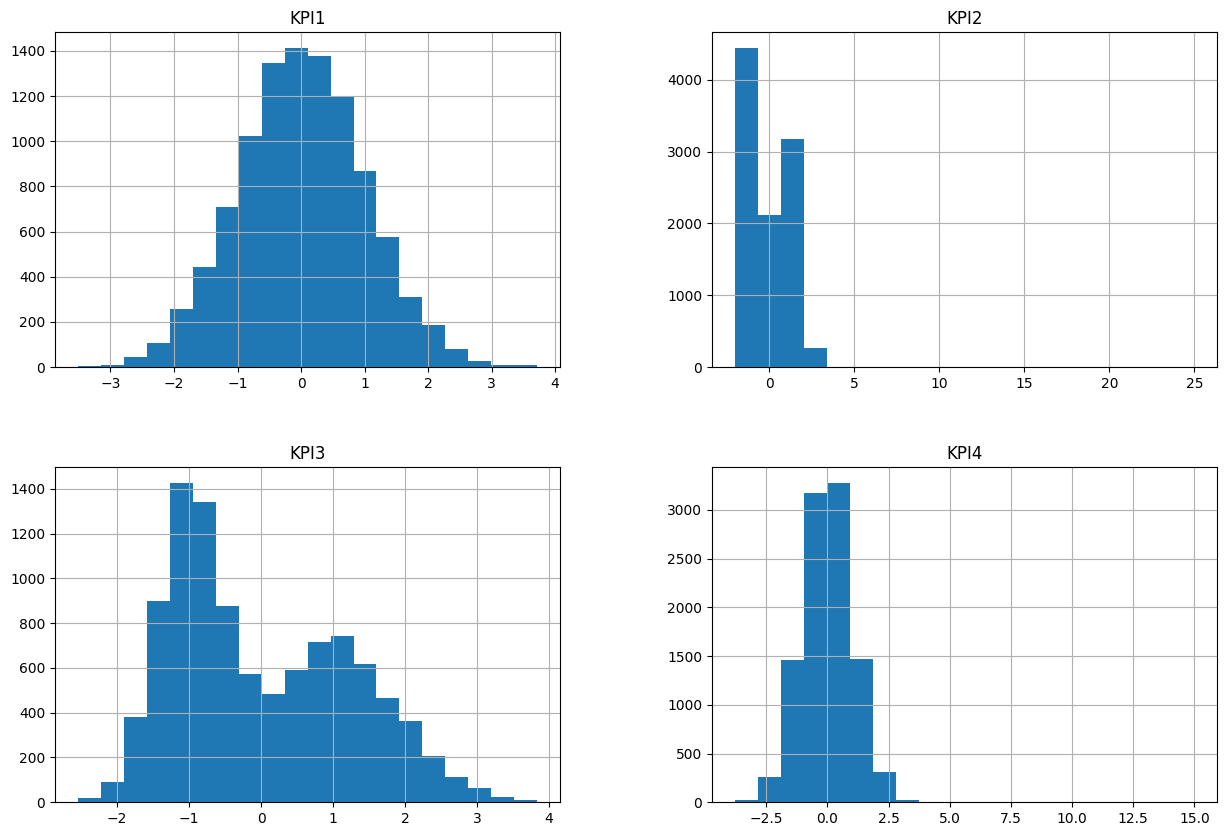

In [5]:
# write your code here
df = data.select(["KPI1","KPI2","KPI3","KPI4"]).toPandas()
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df.hist(ax=ax, bins = 20)

Observe the distributions of the numerical columns in the histograms generated in the previous part.
- Find the columns with outilers
- Remove the outliers

In [6]:
# write your code here
data.select("*").where(data.KPI2 > 5).show()
data.select("*").where(data.KPI4 > 5).show()
print("Before removing the outlier", data.count())
data = data.filter(data.KPI2 < 5)
data = data.filter(data.KPI4 < 5)
print("After removing the outlier", data.count())

+----------+------------+----+------------+----------+----------------+
|EmployeeID|        KPI1|KPI2|        KPI3|      KPI4|Current Employee|
+----------+------------+----+------------+----------+----------------+
|       271|-0.139097477|25.0|-1.039494829|0.34090306|               0|
+----------+------------+----+------------+----------+----------------+

+----------+------------+----------+-----------+----+----------------+
|EmployeeID|        KPI1|      KPI2|       KPI3|KPI4|Current Employee|
+----------+------------+----------+-----------+----+----------------+
|       259|-1.092020773|1.14792853|1.188980132|15.0|               1|
+----------+------------+----------+-----------+----+----------------+

Before removing the outlier 10000
After removing the outlier 9995


Find the missing values in the dataset.

In [7]:
# write your code here
# Using SQL methods
for column in data.columns:
  data.select(count(when(col(column).isNull(), column)).alias(column)).show()

+----------+
|EmployeeID|
+----------+
|         0|
+----------+

+----+
|KPI1|
+----+
|   4|
+----+

+----+
|KPI2|
+----+
|   0|
+----+

+----+
|KPI3|
+----+
|   2|
+----+

+----+
|KPI4|
+----+
|   0|
+----+

+----------------+
|Current Employee|
+----------------+
|               0|
+----------------+



Use **Mean Imputer** to fill the missing values

In [8]:
from pyspark.ml.feature import Imputer
# write your code here
columns_with_missing_values = ["KPI1", "KPI3", "KPI4"]
imputer = Imputer(inputCols = columns_with_missing_values, outputCols = columns_with_missing_values).setStrategy("mean")
imputer = imputer.fit(data)
data = imputer.transform(data)

Again, find the missing values in the dataset to make sure no missing value exists.

In [9]:
# write your code here
for column in data.columns:
  data.select(count(when(col(column).isNull(), column)).alias(column)).show()

+----------+
|EmployeeID|
+----------+
|         0|
+----------+

+----+
|KPI1|
+----+
|   0|
+----+

+----+
|KPI2|
+----+
|   0|
+----+

+----+
|KPI3|
+----+
|   0|
+----+

+----+
|KPI4|
+----+
|   0|
+----+

+----------------+
|Current Employee|
+----------------+
|               0|
+----------------+

